In [2]:
import Pkg; Pkg.add("PyPlot")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/git_repos/TE_EG_project/wavelets_CMI/notebooks/Project.toml`
  No Changes to `~/git_repos/TE_EG_project/wavelets_CMI/notebooks/Manifest.toml`
Precompiling project...
  ✓ InlineStrings
  ✓ JSON
  ✓ Conda
  ✓ TimeZones
  ✓ PyCall
  ✓ Intervals
  ✓ Polynomials
  ✓ PyPlot
  ✓ DSP
  ✓ Wavelets
  ✓ Entropies
  ✓ TransferEntropy
  12 dependencies successfully precompiled in 17 seconds (52 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [3]:
import Distributions: Uniform, Normal
using PyPlot

LoadError: ArgumentError: Package Distributions not found in current path:
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.


In [4]:
#function signal=model_dirCFC(Nd,dir)

# Create one signal with CFC between 10 & 70 Hz
# "dir" imposes a directionality in the link:
#   dir = 0; No directionality
#   dir = 1; Directionality from 10Hz to 70Hz
#   dir = 2; Directionality from 70Hz to 10Hz


Nd = 100
Fs = 1000
#Duration of each segment

#dur = rand(Nd,1); #Uniform distribution



In [8]:
dur=rand(Nd,1)
f = zeros(Nd)
amp=randn(Nd,1); #Normal distribution
for i in 1:Nd
    dur[i] = round(dur[i]*0.04+0.08, digits = 2)
    f[i] = 1 ./ dur[i]#Frequency of each segment
    amp[i]=amp[i]+10 #Amplitude of each segment
end
print(dur)

[0.1; 0.1; 0.09; 0.09; 0.12; 0.11; 0.12; 0.12; 0.1; 0.11; 0.08; 0.1; 0.08; 0.1; 0.09; 0.11; 0.08; 0.1; 0.11; 0.09; 0.11; 0.08; 0.09; 0.11; 0.12; 0.12; 0.11; 0.1; 0.12; 0.12; 0.09; 0.09; 0.12; 0.08; 0.09; 0.12; 0.09; 0.09; 0.11; 0.11; 0.09; 0.11; 0.1; 0.11; 0.08; 0.1; 0.1; 0.1; 0.08; 0.1; 0.09; 0.12; 0.09; 0.11; 0.09; 0.11; 0.08; 0.1; 0.1; 0.1; 0.12; 0.12; 0.1; 0.09; 0.09; 0.1; 0.09; 0.08; 0.1; 0.1; 0.12; 0.08; 0.09; 0.1; 0.1; 0.11; 0.11; 0.09; 0.09; 0.11; 0.1; 0.11; 0.09; 0.12; 0.1; 0.11; 0.12; 0.08; 0.08; 0.1; 0.1; 0.11; 0.09; 0.09; 0.09; 0.09; 0.1; 0.09; 0.11; 0.11]

In [10]:
#Create the fase signal [~10 Hz]
sig_ph=[]
for d in 1:Nd
    t_aux=range(0, stop = dur[d], length = Int(round(Fs*dur[d], sigdigits = 2)) )|> collect
    #println(t_aux[end])
    signal_segment = @. amp[d]*(sin(2*π*f[d]*t_aux + 1.5*π) + 1 )#amp[d]*( amp[d]*sin.(2*π*f[d]*t + 1.5*π*ones(length(t)) +1*ones(length(t)) ))
    push!(sig_ph, signal_segment)
end
sig_ph = collect(Iterators.flatten(sig_ph))

10010-element Vector{Float64}:
 0.0
 0.0214300768883357
 0.0856340161973282
 0.19235329132375678
 0.34115818141259246
 0.5314495016912063
 0.7624610161749752
 1.0332625230291408
 1.3427636001633094
 1.6897179959763389
 2.072728647571686
 2.4902533062365895
 2.940610747533338
 ⋮
 1.935741595581933
 1.6091739624763048
 1.3103413021700892
 1.040236306708466
 0.7997562377230322
 0.5896999458188693
 0.4107652168731885
 0.2635464540608488
 0.14853270330671947
 0.06610602872435677
 0.016540243437418313
 0.0

In [78]:
#Create the amplitude signal [~70 Hz]
f_amp = 70
a=10
c=6
t=range(0, stop = length(sig_ph)/Fs, length=length(sig_ph)) |> collect

sig_amp = []
for i in 1:length(sig_ph)
    #(1-(1./(1 + exp(-a*(sig_ph-c))))) .* (sin(2*pi*f_amp*t)+1);
    aux1 = @. 1 - (1 / (1 + exp(-a*(sig_ph[i] - c))))  
    aux2 = @. (sin(2*π*f_amp*t[i]) + 1)
    #println(aux2)
    push!(sig_amp, aux1 .* aux2)
end
sig_amp = collect(Iterators.flatten(sig_amp))

10000-element Array{Float64,1}:
 1.0
 1.4258190915054811
 1.7705693161443843
 1.9686159698346022
 1.9822542663848446
 1.8088877011541165
 1.4815223823141197
 1.062483217270826
 0.6315482877506153
 0.27076043102017344
 0.04880764935048676
 0.007946057760332192
 0.155955023109158
 ⋮
 1.9920539422396566
 1.9511923506497069
 1.729239568980001
 1.3684517122501207
 0.9375167827295927
 0.518477617685922
 0.19111229884622705
 0.017745733615194936
 0.03138403016543789
 0.22943068385537602
 0.5741809084936925
 0.9999999999994591

In [63]:
#Create noise signals
white_n = 0.8*randn(1,length(sig_ph))
#pink_n  = 0.3*pinknoise[length(sig_ph)]

1×10000 Array{Float64,2}:
 -0.393629  0.922409  0.278039  0.409864  …  -0.302089  -0.187006  0.692246

In [83]:

#Impose directionality [delay one signal 10 ms respect to the other]

del = 100#Int(round(10)); #10 ms delay

signal_0 = sig_ph + sig_amp# + white_n[:]

sig_ph_del = sig_ph[del:end]
sig_amp_del = sig_amp[1:end-del+1]
white_n_del = white_n[1:end-del+1]
#pink_n  = pink_n[1:end-del+1]
signal_ap = sig_ph_del .+ sig_amp_del# .+ white_n_del #+ pink_n

sig_ph_del2 = sig_ph[1:end-del+1]
sig_amp_del2 = sig_amp[del:end]
white_n_del2 = white_n[1:end-del+1]
#pink_n  = pink_n[1:end-del+1]
signal_pa = sig_ph_del2 + sig_amp_del2# + white_n_del2 #+ pink_n

9901-element Array{Float64,1}:
 0.5781649679379374
 1.0235356364199777
 1.506279265052514
 1.9452169854766292
 2.2746219007543083
 2.456673131307003
 2.4885735909965683
 2.402976661951901
 2.261640887959338
 2.14352115452136
 2.12956409834437
 2.287103021533032
 2.6568239041588093
 ⋮
 3.014079889091886
 3.207372109749742
 3.241781458937689
 3.1588495244362864
 3.0264898742244157
 2.9259131627146147
 2.9360098596575472
 3.1181643052937638
 3.504391706973432
 4.091057087392535
 4.839372510266902
 5.682578462925901

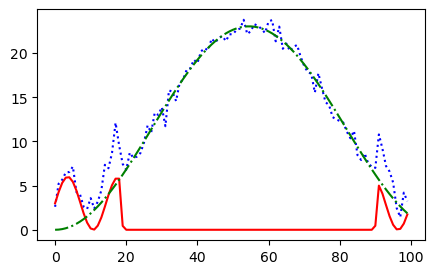

In [74]:
fig = figure(figsize = (5,3))
ax = subplot(111)
px = PyPlot.plot(signal_0[1:100], color = "b", ls= ":"); 
pa = PyPlot.plot(sig_amp[1:100], color = "r", ls= "-"); 
pp = PyPlot.plot(sig_ph[1:100], color = "g", ls= "-."); 

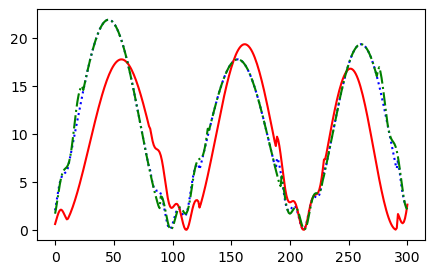

In [84]:
fig = figure(figsize = (5,3))
ax = subplot(111)
px = PyPlot.plot(signal_0[500:800], color = "b", ls= ":"); 
pa = PyPlot.plot(signal_ap[500:800], color = "r", ls= "-"); 
pp = PyPlot.plot(signal_pa[500:800], color = "g", ls= "-."); 

In [104]:
root = "/Users/andreu/Desktop/Dropbox/transfer_inormation_prague/"
dir = "TE_electrodes/model_dirCFC"
name = "/signal_alpha2gamma.mat"
αγ = matread("$root$dir$name")

LoadError: UndefVarError: matread not defined